<a href="https://colab.research.google.com/github/Sachinsn19/Spam-SMS-Detection-Deployment/blob/master/SMS_Spam_detection_deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import pickle as pk

import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysing

In [ ]:
#Loading csv files into Pandas Dataframe
spam_data = pd.read_csv('/content/spam_data.csv')

In [ ]:
#Printing top five rows of the dataset
spam_data.head()

,Unnamed: 0,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Getting some informations about the data
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   v1          5572 non-null   object
 2   v2          5572 non-null   object
 3   Unnamed: 2  50 non-null     object
 4   Unnamed: 3  12 non-null     object
 5   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(5)
memory usage: 261.3+ KB


## Data Cleaning

In [ ]:
#Removing 3 columns
spam_data.drop(columns = ['Unnamed: 0','Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [ ]:
#Renaming column names
spam_data.rename(columns = {'v1':'target','v2':'text'}, inplace=True)

### Label Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
spam_data['target'] = encoder.fit_transform(spam_data['target'])

In [ ]:
spam_data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Checking for missing values
spam_data.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#Checking for duplicated values
spam_data.duplicated().sum()

403

In [ ]:
#Removing duplicated values
spam_data = spam_data.drop_duplicates(keep='first')

In [ ]:
spam_data.duplicated().sum()

0

In [ ]:
#Finding number of columns and rows
spam_data.shape

(5169, 2)

# Data Visualization

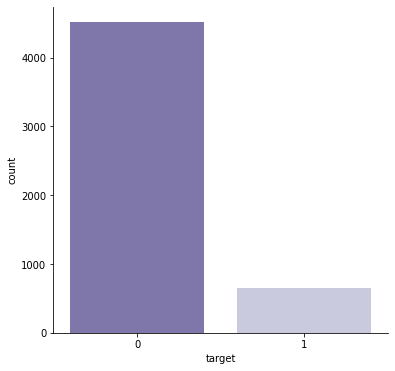

In [ ]:
plot = plt.figure(figsize=(6,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.countplot(spam_data['target'], palette='Purples_r')
plt.show()

Data is imbalanced

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Creating a column with number of characters in each row
spam_data['num_of_characters'] = spam_data['text'].apply(len)

In [ ]:
spam_data.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Creating column with number of words in each row
spam_data['num_of_words'] = spam_data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
spam_data.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#Creating column with number of sentences
spam_data['num_of_sentences'] = spam_data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
spam_data.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#Getting statistical informations about the data
spam_data.iloc[:,1:].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
#Finding differences in values of spam and ham
spam_data.groupby('target').mean()

,num_of_characters,num_of_words,num_of_sentences
target,,,
0,70.459256,16.957484,1.815545
1,137.891271,27.474732,2.969372


0 --> Ham

1 --> Spam

## Data Visualization

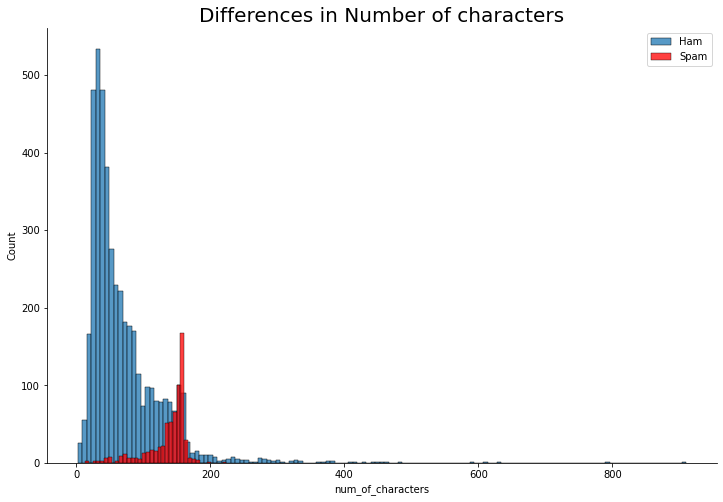

In [ ]:
#Finding differences in number of characters of both ham and spam
plot = plt.figure(figsize=(12,8))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.histplot(spam_data[spam_data['target']==0]['num_of_characters'], label='Ham')
sns.histplot(spam_data[spam_data['target']==1]['num_of_characters'],label='Spam', color='red')
plt.title("Differences in Number of characters", fontsize=20)
plt.legend()
plt.show()

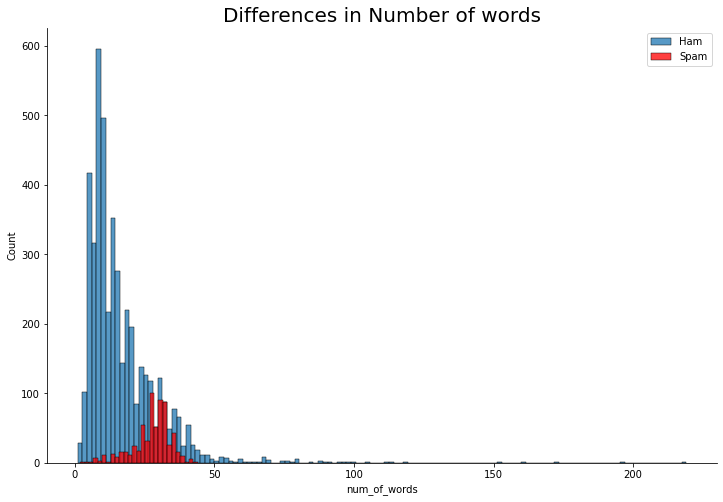

In [ ]:
#Finding differences in number of words of both ham and spam
plot = plt.figure(figsize=(12,8))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.histplot(spam_data[spam_data['target']==0]['num_of_words'], label='Ham')
sns.histplot(spam_data[spam_data['target']==1]['num_of_words'],label='Spam', color='red')
plt.title("Differences in Number of words", fontsize=20)
plt.legend()
plt.show()

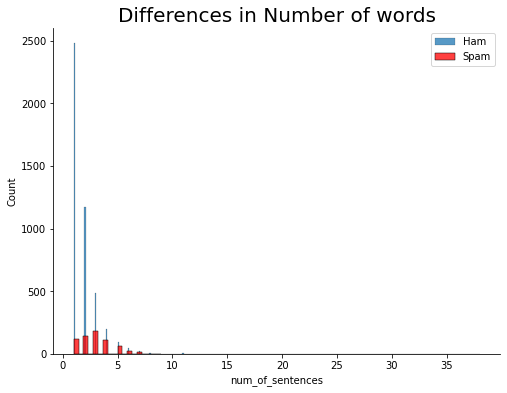

In [ ]:
#Finding differences in number of sentences of both ham and spam
plot = plt.figure(figsize=(8,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.histplot(spam_data[spam_data['target']==0]['num_of_sentences'], label='Ham')
sns.histplot(spam_data[spam_data['target']==1]['num_of_sentences'],label='Spam', color='red')
plt.title("Differences in Number of words", fontsize=20)
plt.legend()
plt.show()

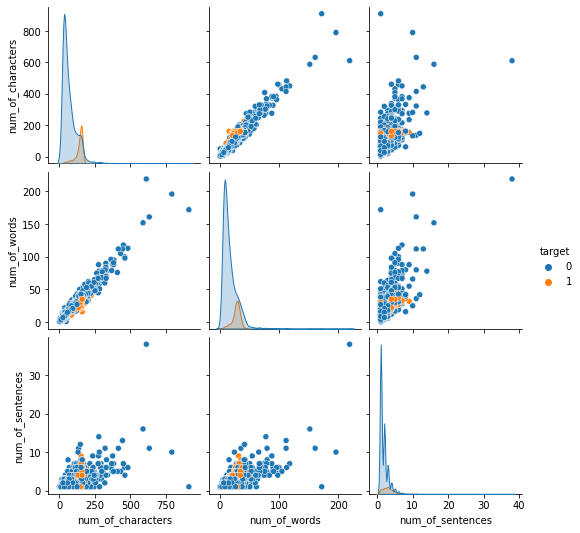

In [ ]:
sns.pairplot(spam_data, hue='target')
plt.show()

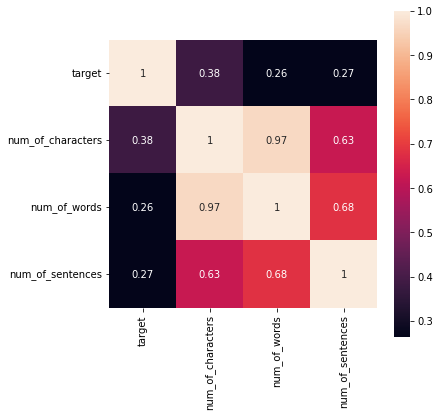

In [ ]:
plot = plt.figure(figsize=(6,6))
sns.heatmap(spam_data.corr(), annot=True, square=True)
plt.show()

# Data Preprocessing



* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming



In [ ]:
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def text_transformation(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
   
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and  i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  
  return  " ".join(y)


In [ ]:
text_transformation("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
spam_data['transformed_text'] = spam_data['text'].apply(text_transformation)

In [ ]:
spam_data.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#Assigning WordCloud method to variable
wc = WordCloud(width=500, height=500, background_color='white', min_font_size=10)

In [ ]:
spam_wc = wc.generate(spam_data[spam_data['target']==1]['transformed_text'].str.cat(sep=""))

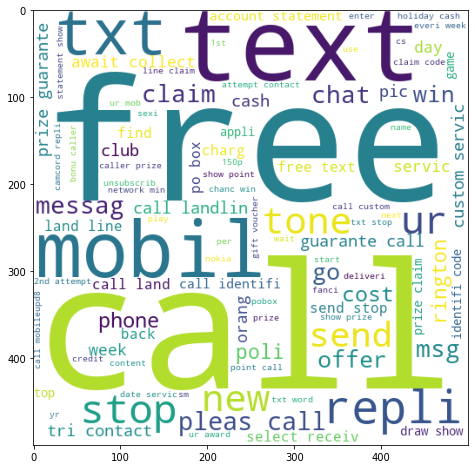

In [ ]:
#Wordcloud  image of Spam message
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)
plt.show()

In [ ]:
ham_wc = wc.generate(spam_data[spam_data['target']==0]['transformed_text'].str.cat(sep=""))

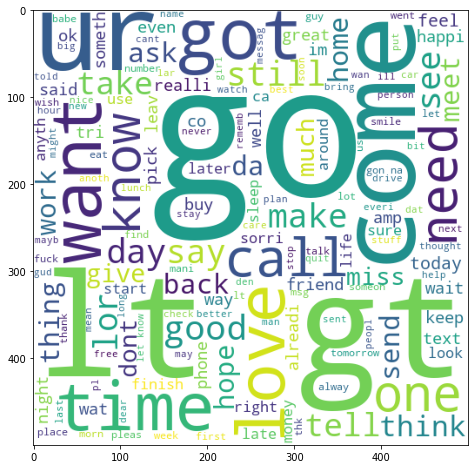

In [ ]:
##Wordcloud  image of Ham messages
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)
plt.show()


In [ ]:
spam_data.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#Finding most repetitive words in spam messages
spam_corpus = []
for msg in spam_data[spam_data['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
#Finding length of spam corpus
len(spam_corpus)

9883

In [ ]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

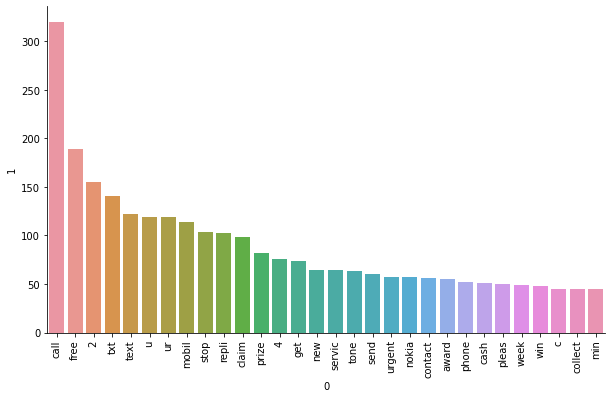

In [ ]:
plot = plt.figure(figsize=(10,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Finding most repetitive words in ham messages
ham_corpus = []
for msg in spam_data[spam_data['target']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [ ]:
#Length of ham corpus
len(ham_corpus)

34771

In [ ]:
 Counter(ham_corpus).most_common(30)

[('u', 871),
 ('go', 401),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 272),
 ('got', 236),
 ('like', 234),
 ('know', 234),
 ('call', 232),
 ('time', 217),
 ('good', 212),
 ('want', 208),
 ('ok', 207),
 ('love', 206),
 ('ur', 197),
 ('day', 184),
 ('need', 170),
 ('one', 164),
 ('4', 155),
 ('lor', 153),
 ('think', 149),
 ('home', 149),
 ('see', 145),
 ('still', 142),
 ('take', 141),
 ('da', 133),
 ('tell', 133),
 ('make', 129)]

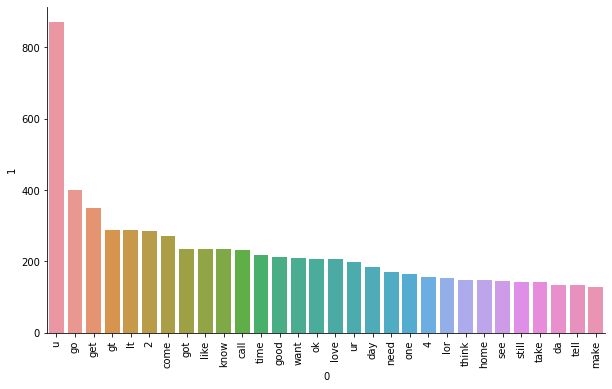

In [ ]:
plot = plt.figure(figsize=(10,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

### Vectorization

In [ ]:
#Converting  collection of raw documents to a matrix of TF-IDF features.
tfidf = TfidfVectorizer(max_features=3000)

### Splitting Feature and Targets

In [ ]:
X = tfidf.fit_transform(spam_data['transformed_text']).toarray()
y = spam_data['target'].values

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2)

### Model Selection

In [ ]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        'Naive Bayes': {
            'model': MultinomialNB(),
            'parameters': {
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear', 'sigmoid']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=2)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False, scoring='precision')
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.984895
1,Naive Bayes,{},0.994418
2,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.834032
3,random_forest,{'n_estimators': 20},0.994667
4,svm,"{'C': 1, 'kernel': 'linear'}",0.983696


In [ ]:
# Using cross_val_score for gaining average accuracy
scores = cross_val_score(RandomForestClassifier(n_estimators= 20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 97%


### Model Training

RandomForest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators=20, random_state=0)

#Training the RandomForest Classifier model with training data
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
#Accuracy and precision score on training data
y_pred = clf.predict(X_train)
training_data_accuracy = accuracy_score(y_train,y_pred)
print('Accuracy score of training data :  {:.2f}% '.format(training_data_accuracy*100))
print("Precision score of training data :  {:.2f} ".format(precision_score(y_train,y_pred)))

Accuracy score of training data :  99.88% 
Precisionscore of training data :  1.00 


In [ ]:
#Accuracy and precision score on test data
y_pred = clf.predict(X_test)
training_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of test data :  {:.2f}% '.format(training_data_accuracy*100))
print("Precisio nscore of test data :  {:.2f} ".format(precision_score(y_test,y_pred)))

Accuracy score of test data :  97.20% 
Precisio nscore of test data :  0.98 


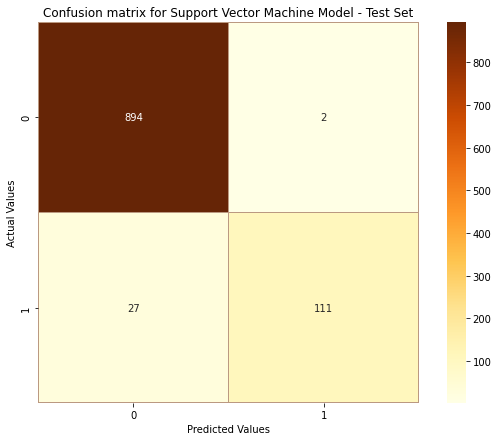

In [ ]:
# Creating a confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="YlOrBr", fmt='g', square=True, linecolor='#BB9981', linewidths=0.01)
plt.title('Confusion matrix for Support Vector Machine Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Saving Trained Model

In [ ]:
filename = 'vectorizer.pkl'
pk.dump(tfidf,open(filename,'wb'))
pk.dump(clf,open('model.pkl','wb'))